<a href="https://colab.research.google.com/github/Strojove-uceni/23206-final-sudoku-solver/blob/main/SudokuSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import typing
import itertools
import copy

class SudokuBoard():
  # creates empty board
  def __init__(self):
    self.board = [0]*9
    for i in range(9):
      self.board[i] = [0]*9

  def __str__(self) -> str:
    result = ""
    for row in self.board:
      for column in row:
        result = result + str(column) + " "
      result = result + "\n"
    return result

  def load_from_number(self, input : int) -> None:
    self.load_from_string(str(input))

  def load_from_string(self, input: str) -> None:
    temp = [s for s in input.split() if s.isdigit()]
    sanitized_string  = ''.join([str(x) for x in temp])
    if len(sanitized_string) != 81:
      raise RuntimeError("Invalid Sudoku Length")
    for i, character in enumerate(sanitized_string):
      self.board[i//9][i%9] = int(character)

  def is_invalid(self):
    # checks if any row or any column or any square contains 2 of the same number
    for row in range(9):
      temp = ''.join([str(x) for x in self.board[row]])
      temp = temp.replace("0", "")
      if len(temp) != len(set(temp)):
        return True

    for column in range(9):
      temp = ""
      for row in range(9):
        temp = temp + str(self.board[row][column])
      temp = temp.replace("0", "")
      if len(temp) != len(set(temp)):
        return True

    for square_row_index, square_column_index in itertools.product(range(3), range(3)):
      temp = ""
      for sub_row, sub_column in itertools.product(range(3), range(3)):
        temp = temp + str(self.board[square_row_index*3 + sub_row][square_column_index*3 + sub_column])
      temp = temp.replace("0", "")
      if len(temp) != len(set(temp)):
        return True
    return False

  def new_modified_board(self, row, column, new_char):
    new = SudokuBoard()
    new.board = copy.deepcopy(self.board)
    new.board[row][column] = new_char
    return new


  def solve(self):
    # Solves loaded Sudoku using backtracking (DFS)

    def find_empty_spot(board):
      for i in range(len(board)):
          for j in range(len(board[0])):
              if board[i][j] == 0:
                  return i, j  # row, column
      return None

    def solve_board(board):
      find = find_empty_spot(board)
      if not find:  # if find is None or False
        return True
      else:
        row, col = find

      for num in range(1, 10):
        if valid(board, num, (row, col)):
          board[row][col] = num

          if solve_board(board):
            return True

          board[row][col] = 0

      return False


    def valid(board, num, pos):
      # Checks row
      for i in range(len(board[0])):
        if board[pos[0]][i] == num and pos[1] != i:
          return False

      # Checks column
      for i in range(len(board)):
        if board[i][pos[1]] == num and pos[0] != i:
          return False

      # Checks box
      box_x = pos[1] // 3
      box_y = pos[0] // 3

      for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x*3, box_x*3 + 3):
          if board[i][j] == num and (i, j) != pos:
            return False
      return True

    solve_board(self.board)


In [29]:
sudoku = SudokuBoard()
sudoku.load_from_string("000000000100004089008009174083906000006000007400007020004600090070008060000001300")


print(sudoku)
sudoku.solve()
print(sudoku)

0 0 0 0 0 0 0 0 0 
1 0 0 0 0 4 0 8 9 
0 0 8 0 0 9 1 7 4 
0 8 3 9 0 6 0 0 0 
0 0 6 0 0 0 0 0 7 
4 0 0 0 0 7 0 2 0 
0 0 4 6 0 0 0 9 0 
0 7 0 0 0 8 0 6 0 
0 0 0 0 0 1 3 0 0 

9 4 7 8 1 2 6 5 3 
1 3 5 7 6 4 2 8 9 
6 2 8 5 3 9 1 7 4 
7 8 3 9 2 6 4 1 5 
2 9 6 1 4 5 8 3 7 
4 5 1 3 8 7 9 2 6 
8 1 4 6 5 3 7 9 2 
3 7 2 4 9 8 5 6 1 
5 6 9 2 7 1 3 4 8 



In [73]:
!pip install py-sudoku


from sudoku import Sudoku
from random import randint
import numpy as np
import cv2
import tensorflow_datasets as tfds
from PIL import Image

In [129]:

ds = tfds.load('mnist', split='train', shuffle_files=True)
iterator = ds.as_numpy_iterator()

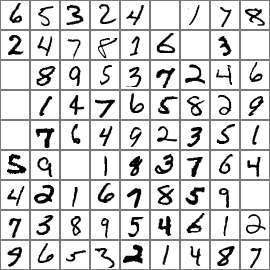

In [143]:
padding = 3

def generate_image():
  sudoku = Sudoku(3, seed=randint(0, 20000)).difficulty(0.1)
  # print(sudoku)

  def get_image_as_array(number):
    if number == None:
      return np.invert(np.zeros((28,28), dtype = np.uint8))
    run = True
    while run:
      current = iterator.next()
      if current["label"] == number:
        run = False
    x = current["image"]
    x = np.squeeze(x,2)

    return np.invert(x)
    # img = Image.fromarray(x, 'L')

  def get_image_with_border(number):
    x = get_image_as_array(number)

    b = 1
    return cv2.copyMakeBorder(x, b,b,b,b, cv2.BORDER_CONSTANT, value=[122])



  def make_row(row):
    sequence = []
    for i in sudoku.board[row]:
      sequence.append(get_image_with_border(i))
    return np.hstack(tuple(sequence))

  def make_board():
    sequence = []
    for i in range(9):
      sequence.append(make_row(i))
    return np.vstack(tuple(sequence))

  return make_board(), sudoku.board


image, board = generate_image()
img = Image.fromarray(image, 'L')
display(img)